In [5]:
import joblib
import time
import mysql.connector
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)


In [6]:

df = pd.read_csv('olx_data_With_Final_Cleaning.csv')
df


c:\users\karem\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-02-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,...,1,1,1,1,0,0,0,0,2,1521
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-14,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,...,0,0,0,0,0,0,0,0,4,1565
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-04-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,...,0,0,0,0,0,0,0,0,4,1304
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-26,Gesr Al Suez,no_compound,Apartment,450000,135,3,7,...,0,0,0,0,0,0,0,0,4,3333
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-04-28,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,...,0,0,0,0,0,0,0,0,4,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-04-28,15 May City,no_compound,Apartment,550000,125,3,2,...,0,0,0,0,0,0,0,0,4,4400
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-04-28,15 May City,Dar Misr,Apartment,600000,140,3,3,...,0,0,0,0,0,0,0,0,4,4285
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-02-28,15 May City,Jewar,Apartment,470000,80,2,5,...,0,0,0,0,0,0,0,0,2,5875
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-02-28,15 May City,no_compound,Apartment,470000,100,2,4,...,1,1,0,1,0,0,0,0,2,4700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   location                     37709 non-null  object
 4   compound                     37709 non-null  object
 5   type                         37709 non-null  object
 6   price                        37709 non-null  int64 
 7   area                         37709 non-null  int64 
 8   bedrooms                     37709 non-null  object
 9   level                        37709 non-null  object
 10  furnished                    37709 non-null  object
 11  price_type                   37709 non-null  object
 12  bathrooms                    37709 non-null  object
 13  payment_option               37

<AxesSubplot:xlabel='location', ylabel='meterprice'>

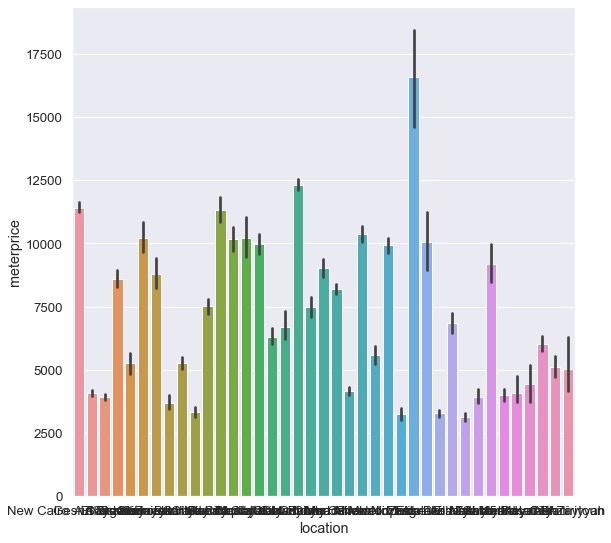

In [8]:
sns.barplot(x='location',y='meterprice',data=df,estimator=np.mean)

In [5]:
df.columns


Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

In [7]:
df['location'].unique()

array(['New Cairo - El Tagamoa', 'Gesr Al Suez', 'Ain Shams', 'Nasr City',
       'Sayeda Zeinab', 'Katameya', 'Shorouk City', 'Hadayek Helwan',
       'Badr City', 'Salam City', 'Shubra', 'Rehab City',
       'New Capital City', 'Mokattam', 'Mostakbal City',
       'Hadayek al-Kobba', 'Obour City', 'Madinaty', 'Downtown Cairo',
       'Maadi', 'Zahraa Al Maadi', 'Helwan', 'Sheraton', 'New Nozha',
       'Heliopolis', 'Marg', 'Zamalek', 'Almazah', 'Ezbet El Nakhl',
       'Abasiya', 'Dar al-Salaam', 'Matareya', 'Al Manial',
       'Zawya al-Hamra', '15 May City', 'Basateen', 'Helmeyat El Zaytoun',
       'Waili', 'Al Amiriyyah'], dtype=object)

Location Categories

In [6]:
df['location'].value_counts()

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Heliopolis                 1623
Gesr Al Suez               1561
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al-Hamra              150
Waili   

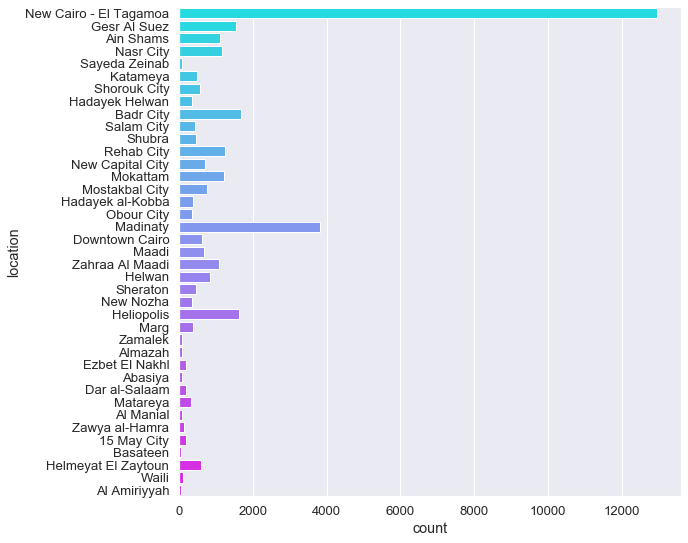

In [15]:
sns.countplot(y='location',data=df,palette='cool')

In [12]:
sns.color_palette("flare")


ValueError: flare is not a valid palette name

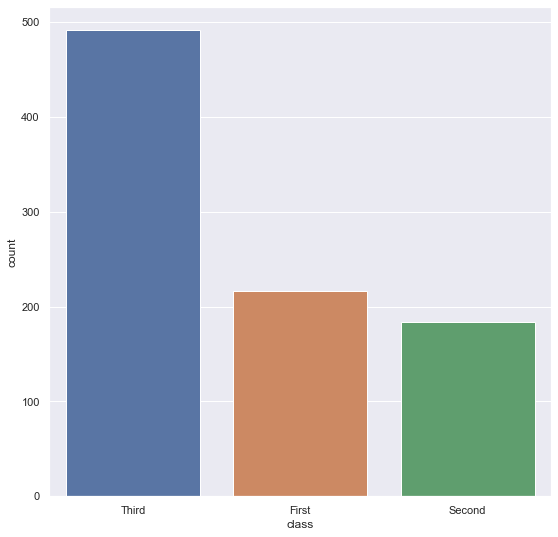

In [5]:
sns.set(style='darkgrid')

titanic = sns.load_dataset('titanic')
sns.countplot(x = 'class',
              data = titanic,
              order = titanic['class'].value_counts().index)
plt.show()

In [9]:
df['down_payment'].unique()

array([      0,  530000,  315000, ..., 7700000,  100793,  195725],
      dtype=int64)

In [ ]:
df.in